# Визуализация эмпирических данных для сравнения с результатами модели

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

<Axes: title={'center': 'Heatmap по эмпирическим данным CSES в США (2008-2020)'}>

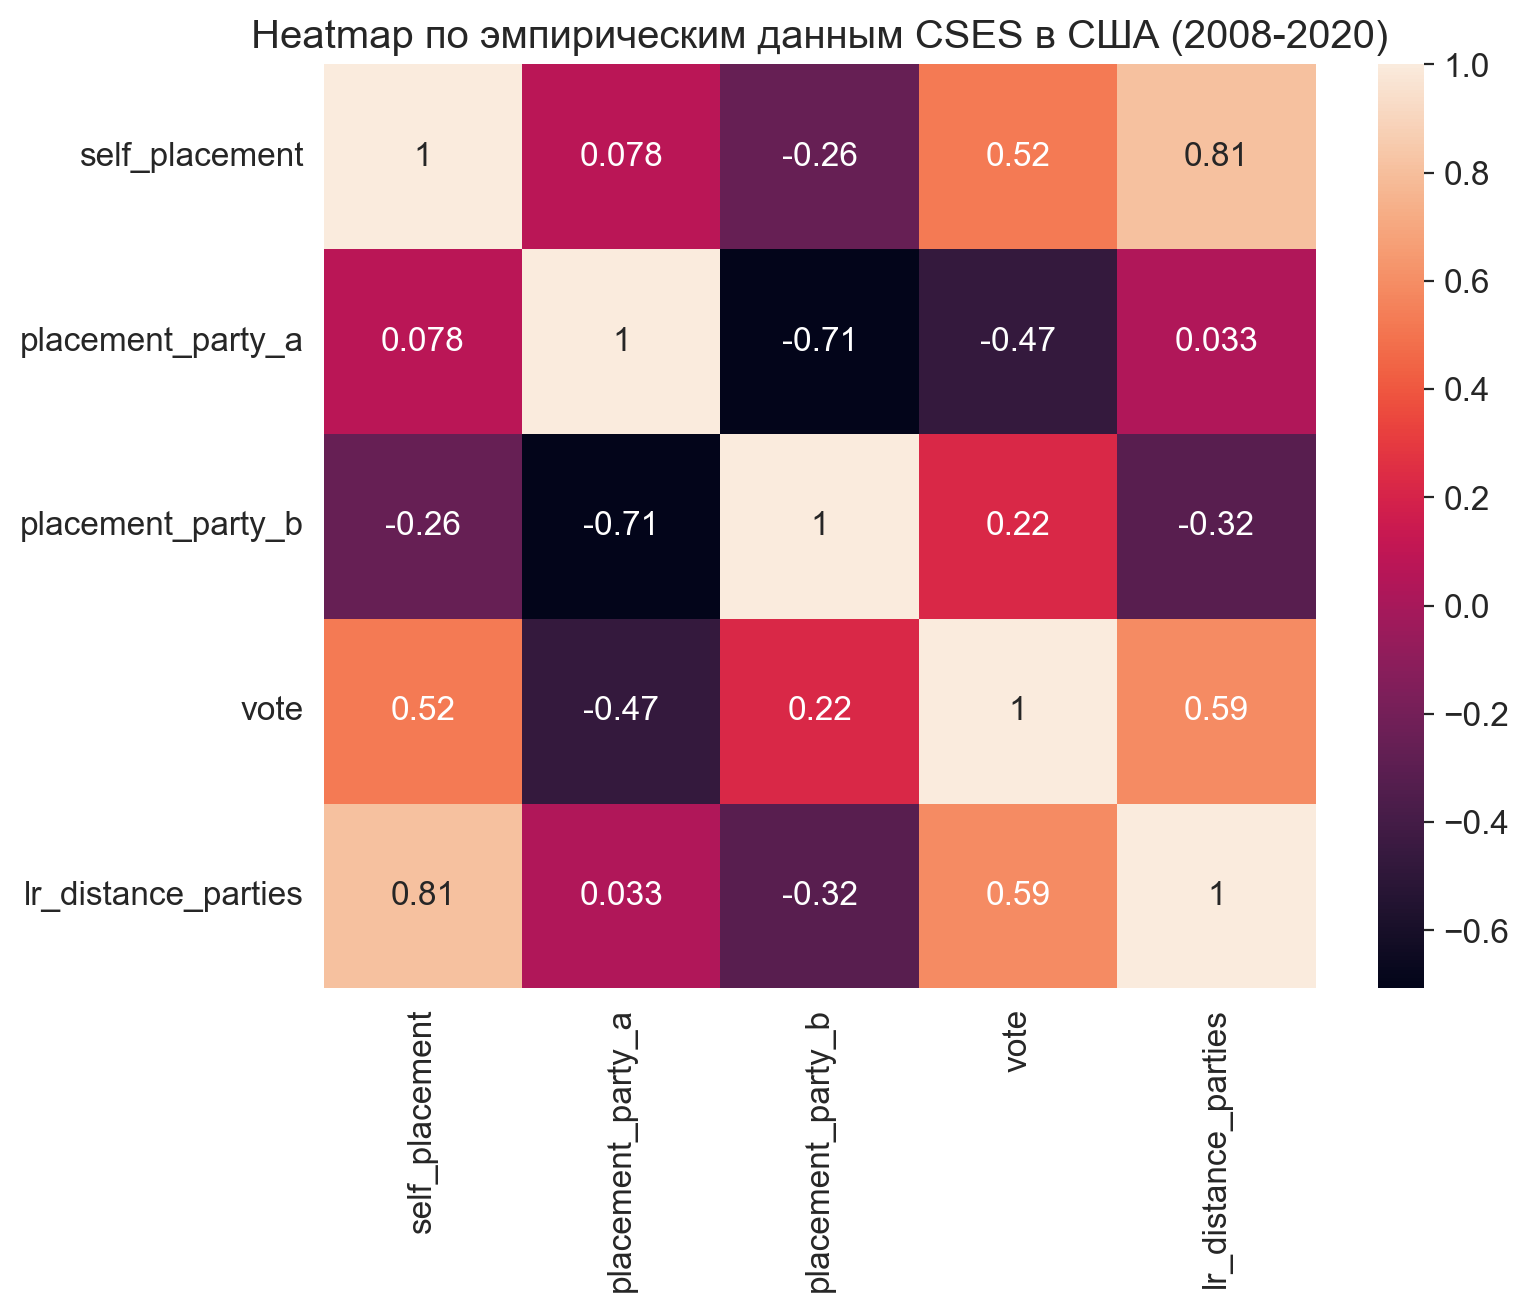

In [2]:
df_empir = pd.read_excel("!база США 01 10 2024.xls")
df_compare = df_empir.copy()
df_compare['vote'] = (df_compare['vote'] == 1).astype(int)
plt.figure(figsize=(8, 6))
plt.title("Heatmap по эмпирическим данным CSES в США (2008-2020)")
sns.heatmap(df_compare[['self_placement', 'placement_party_a', 'placement_party_b', 'vote', 'lr_distance_parties']].corr(), annot=True)

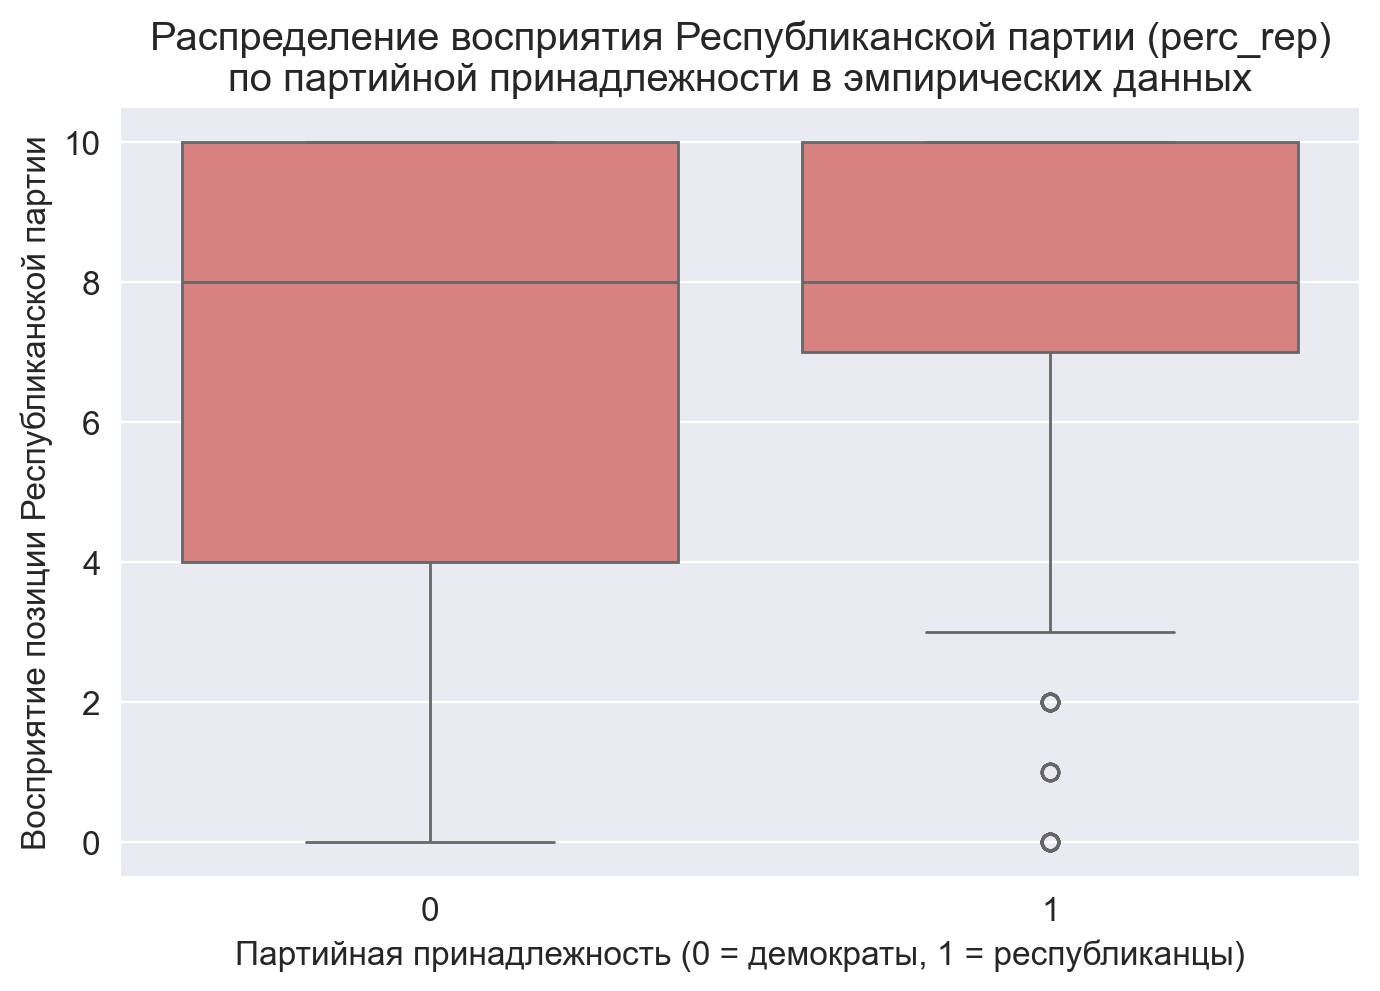

In [3]:
sns.boxplot(data=df_compare, x='vote', y='placement_party_b', color="#E57373")
plt.title("Распределение восприятия Республиканской партии (perc_rep)\nпо партийной принадлежности в эмпирических данных")
plt.xlabel("Партийная принадлежность (0 = демократы, 1 = республиканцы)")
plt.ylabel("Восприятие позиции Республиканской партии")
plt.show()

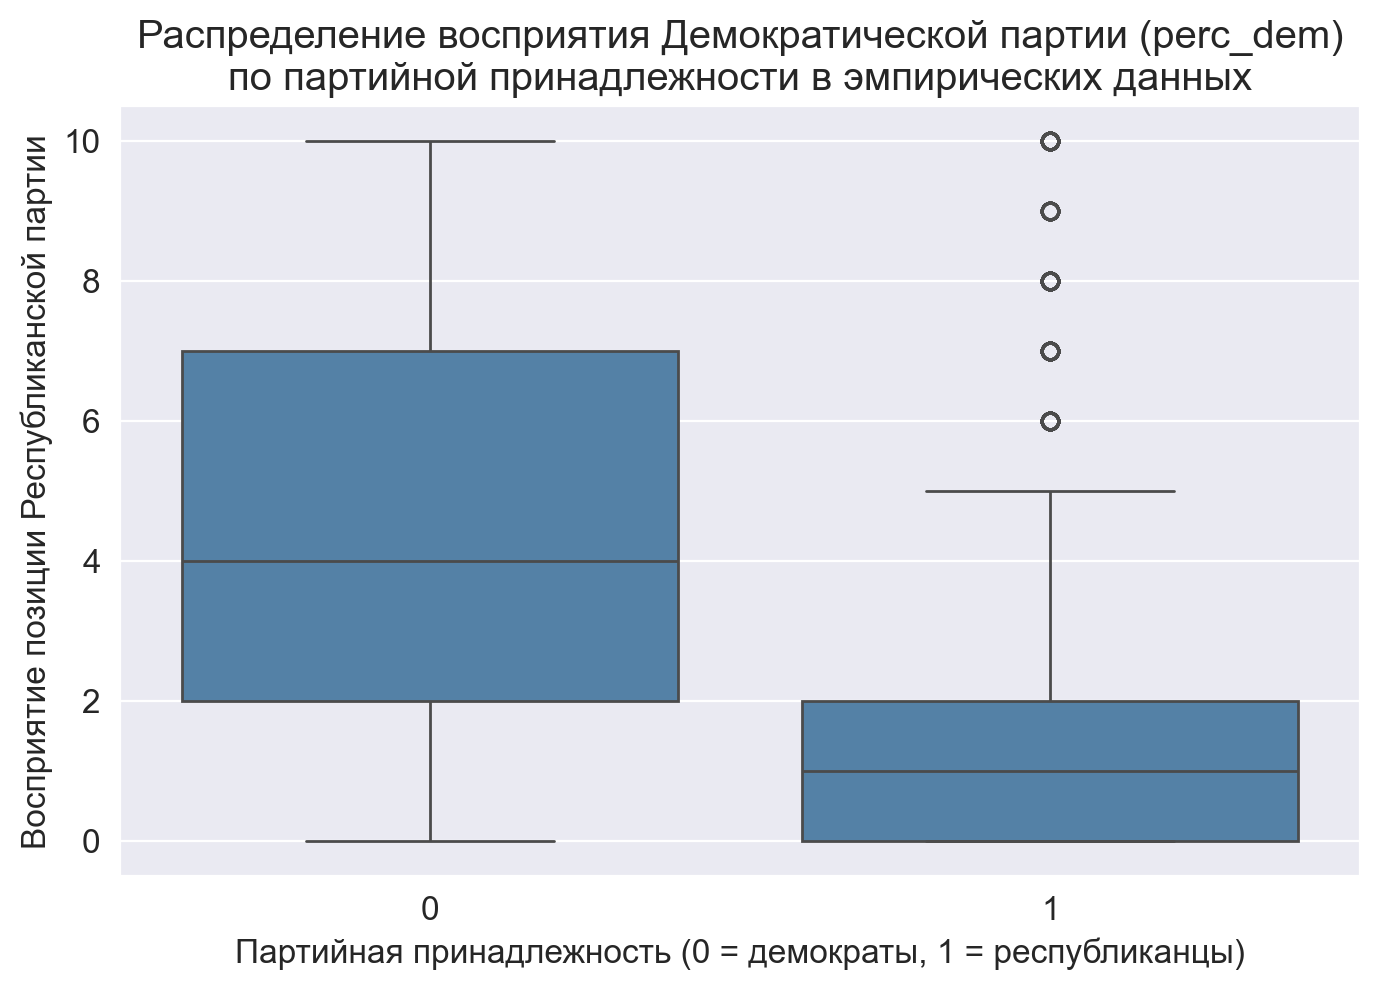

In [4]:
sns.boxplot(data=df_compare, x='vote', y='placement_party_a', color="steelblue")
plt.title("Распределение восприятия Демократической партии (perc_dem)\nпо партийной принадлежности в эмпирических данных")
plt.xlabel("Партийная принадлежность (0 = демократы, 1 = республиканцы)")
plt.ylabel("Восприятие позиции Республиканской партии")
plt.show()

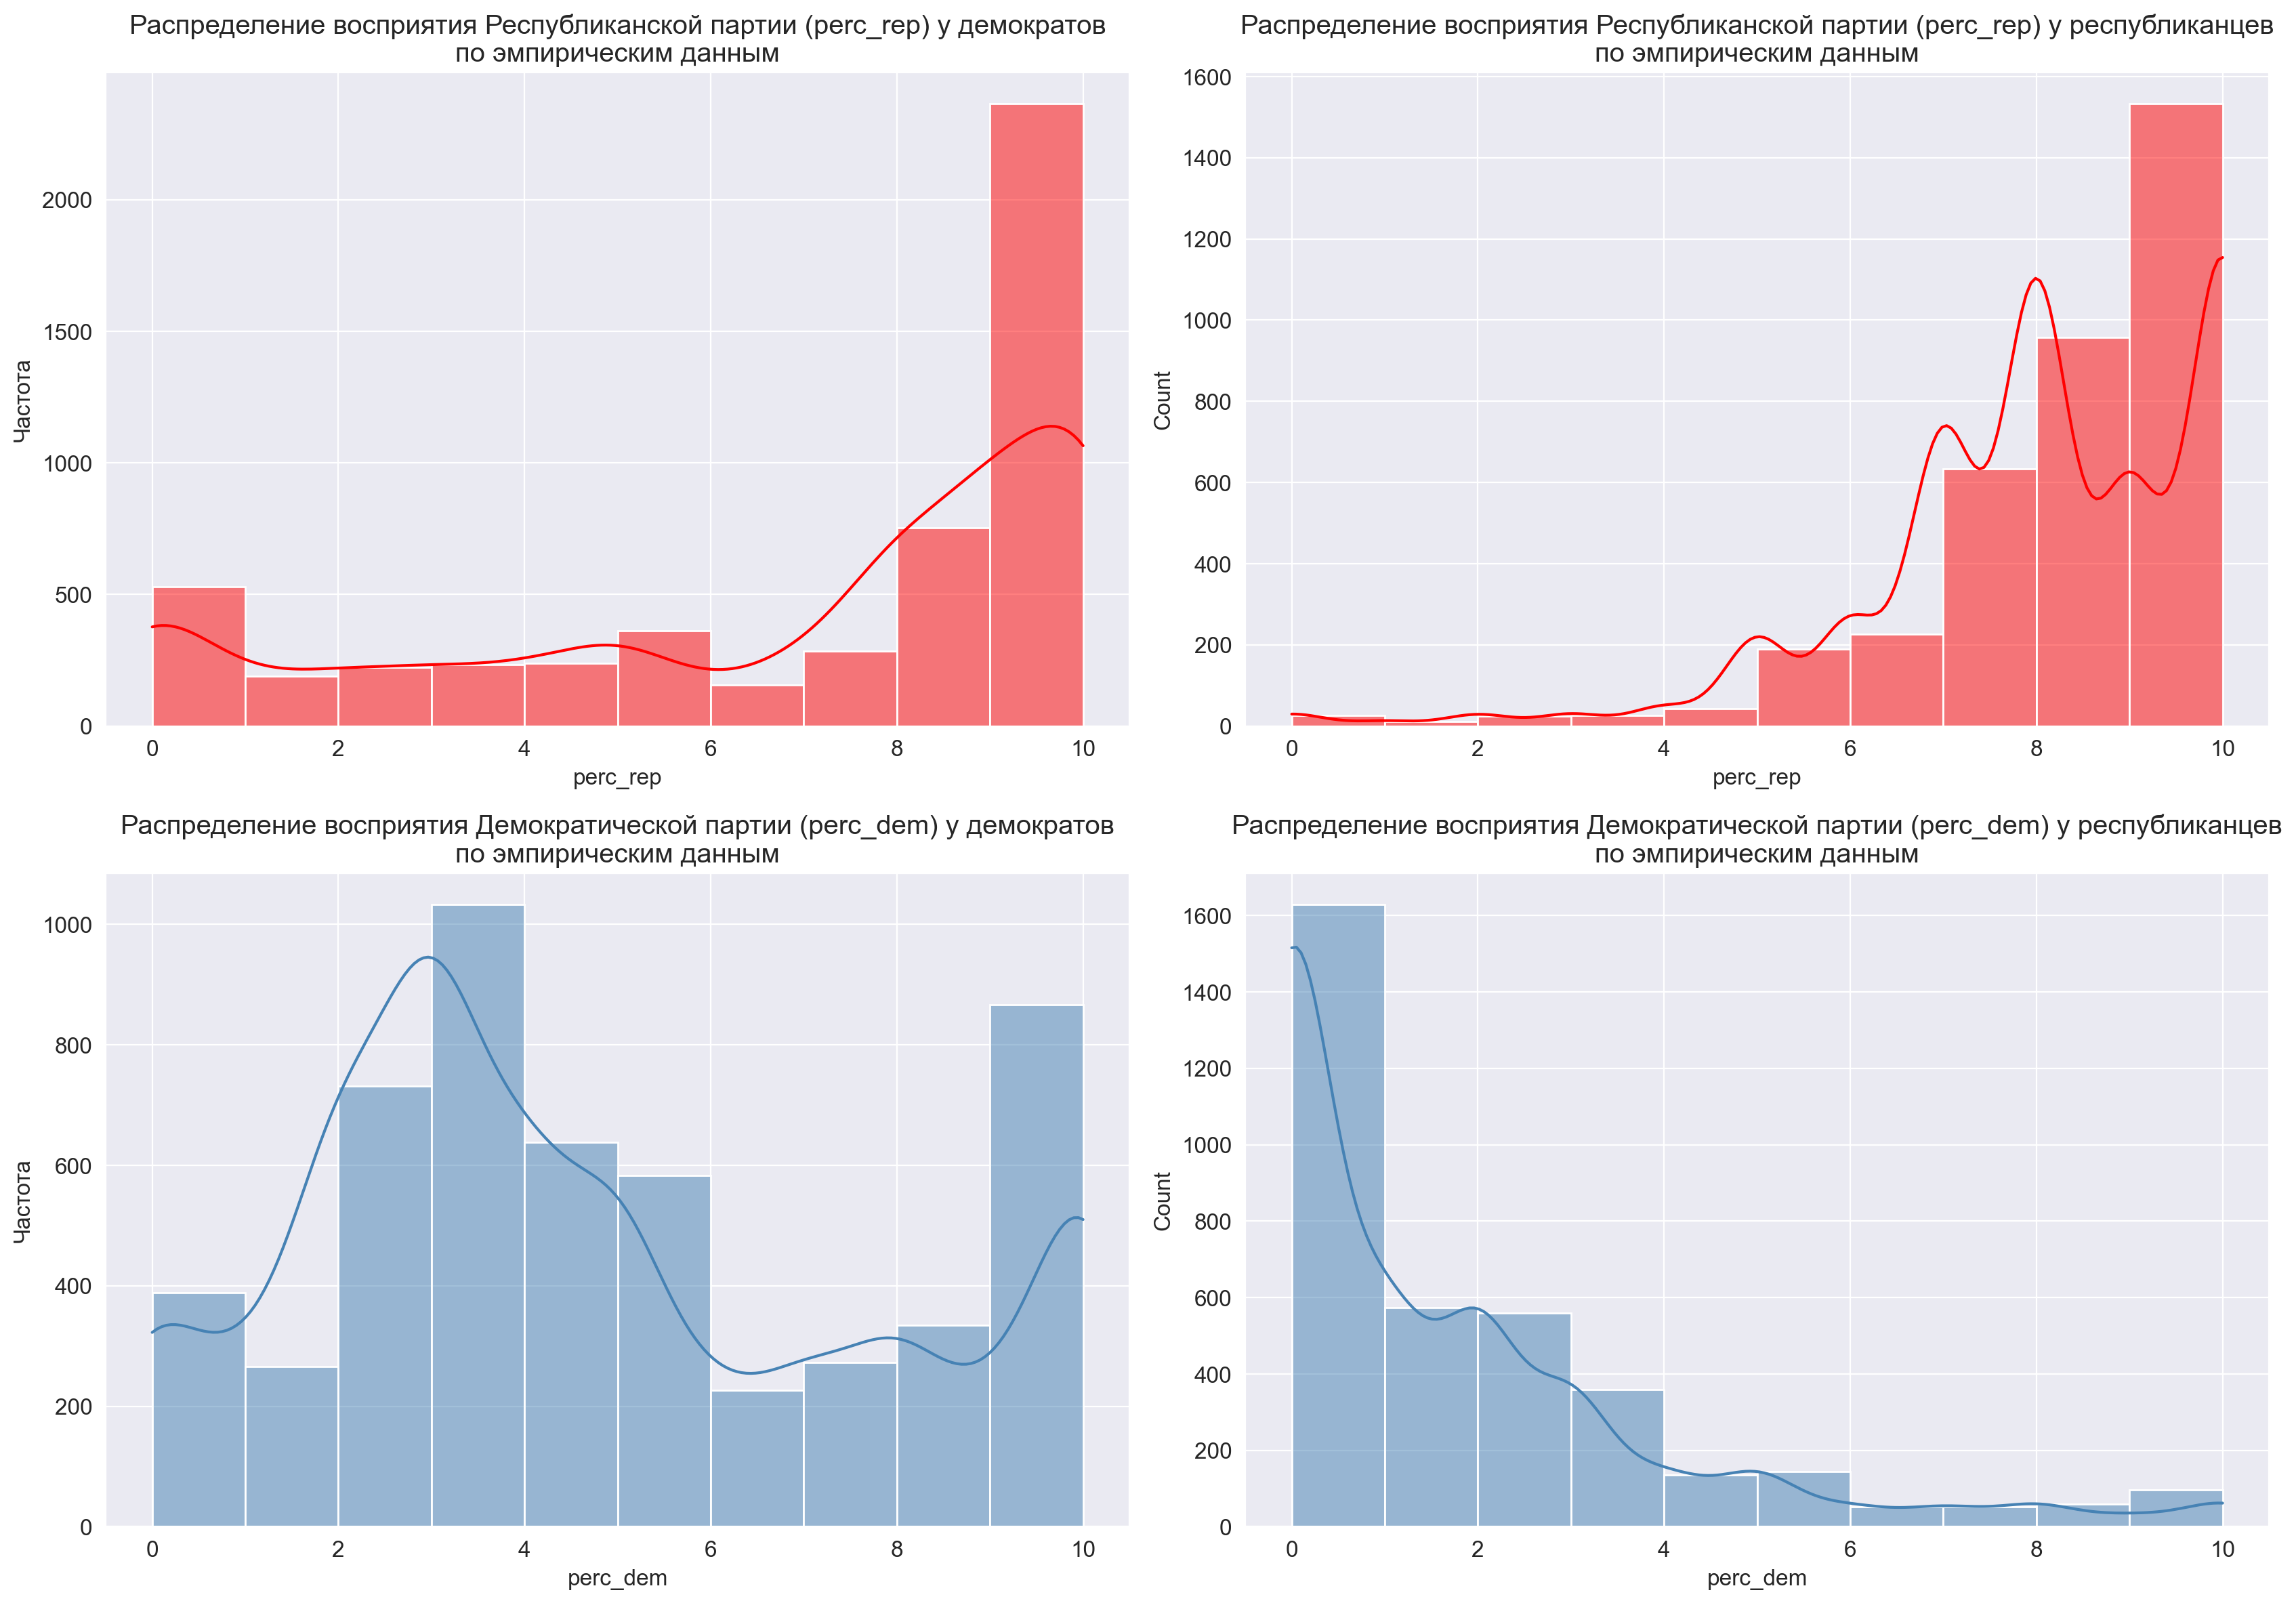

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

# 1. Democrats' perception of Republicans
sns.histplot(data=df_compare[df_compare['vote'] == 0], 
             x='placement_party_b', bins=10, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title("Распределение восприятия Республиканской партии (perc_rep) у демократов\nпо эмпирическим данным")
axes[0, 0].set_xlabel("perc_rep")
axes[0, 0].set_ylabel("Частота")

# 2. Republicans' perception of Republicans
sns.histplot(data=df_compare[df_compare['vote'] == 1], 
             x='placement_party_b', bins=10, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title("Распределение восприятия Республиканской партии (perc_rep) у республиканцев\nпо эмпирическим данным")
axes[0, 1].set_xlabel("perc_rep")

# 3. Democrats' perception of Democrats
sns.histplot(data=df_compare[df_compare['vote'] == 0], 
             x='placement_party_a', bins=10, kde=True, color='steelblue', ax=axes[1, 0])
axes[1, 0].set_title("Распределение восприятия Демократической партии (perc_dem) у демократов\nпо эмпирическим данным")
axes[1, 0].set_xlabel("perc_dem")
axes[1, 0].set_ylabel("Частота")

# 4. Republicans' perception of Democrats
sns.histplot(data=df_compare[df_compare['vote'] == 1], 
             x='placement_party_a', bins=10, kde=True, color='steelblue', ax=axes[1, 1])
axes[1, 1].set_title("Распределение восприятия Демократической партии (perc_dem) у республиканцев\nпо эмпирическим данным")
axes[1, 1].set_xlabel("perc_dem")

plt.tight_layout()
plt.show()

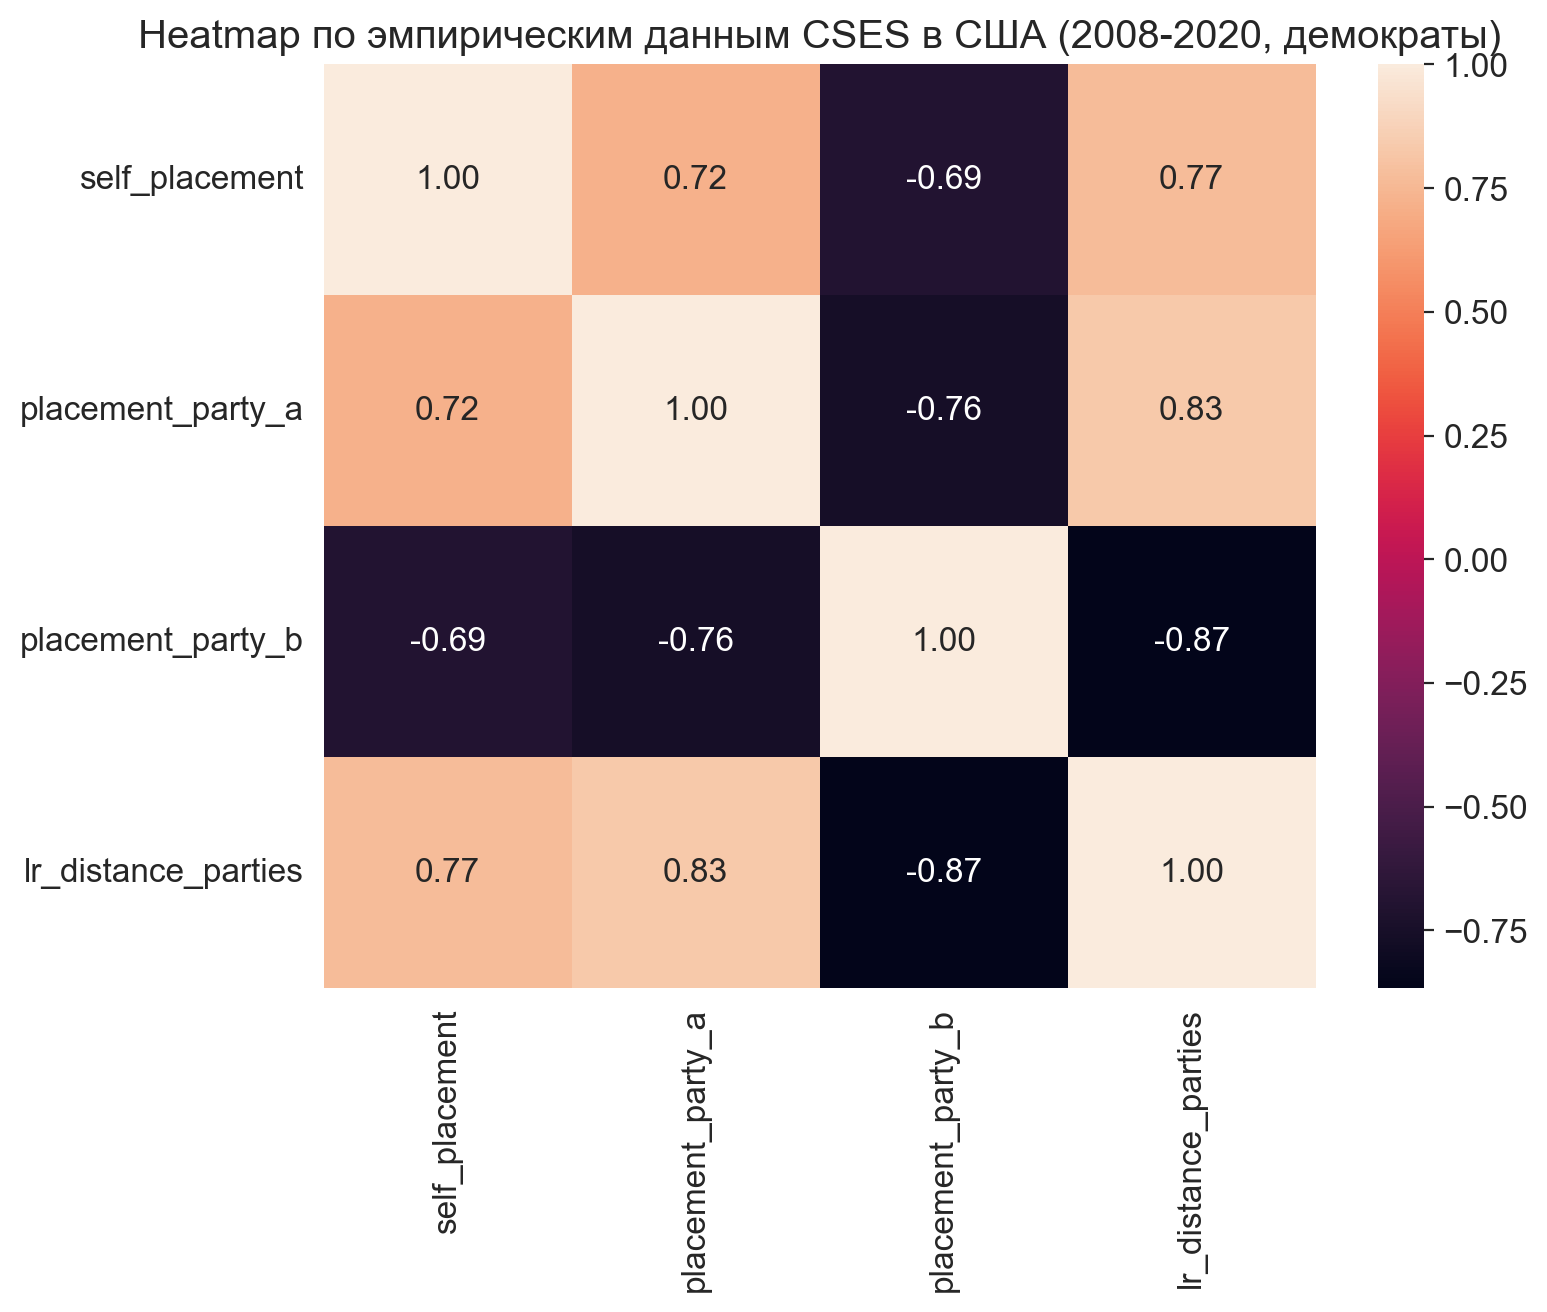

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_compare[df_compare['vote'] == 0][['self_placement', 'placement_party_a', 'placement_party_b', 'lr_distance_parties']].corr(), annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f"Heatmap по эмпирическим данным CSES в США (2008-2020, демократы)")
plt.show()

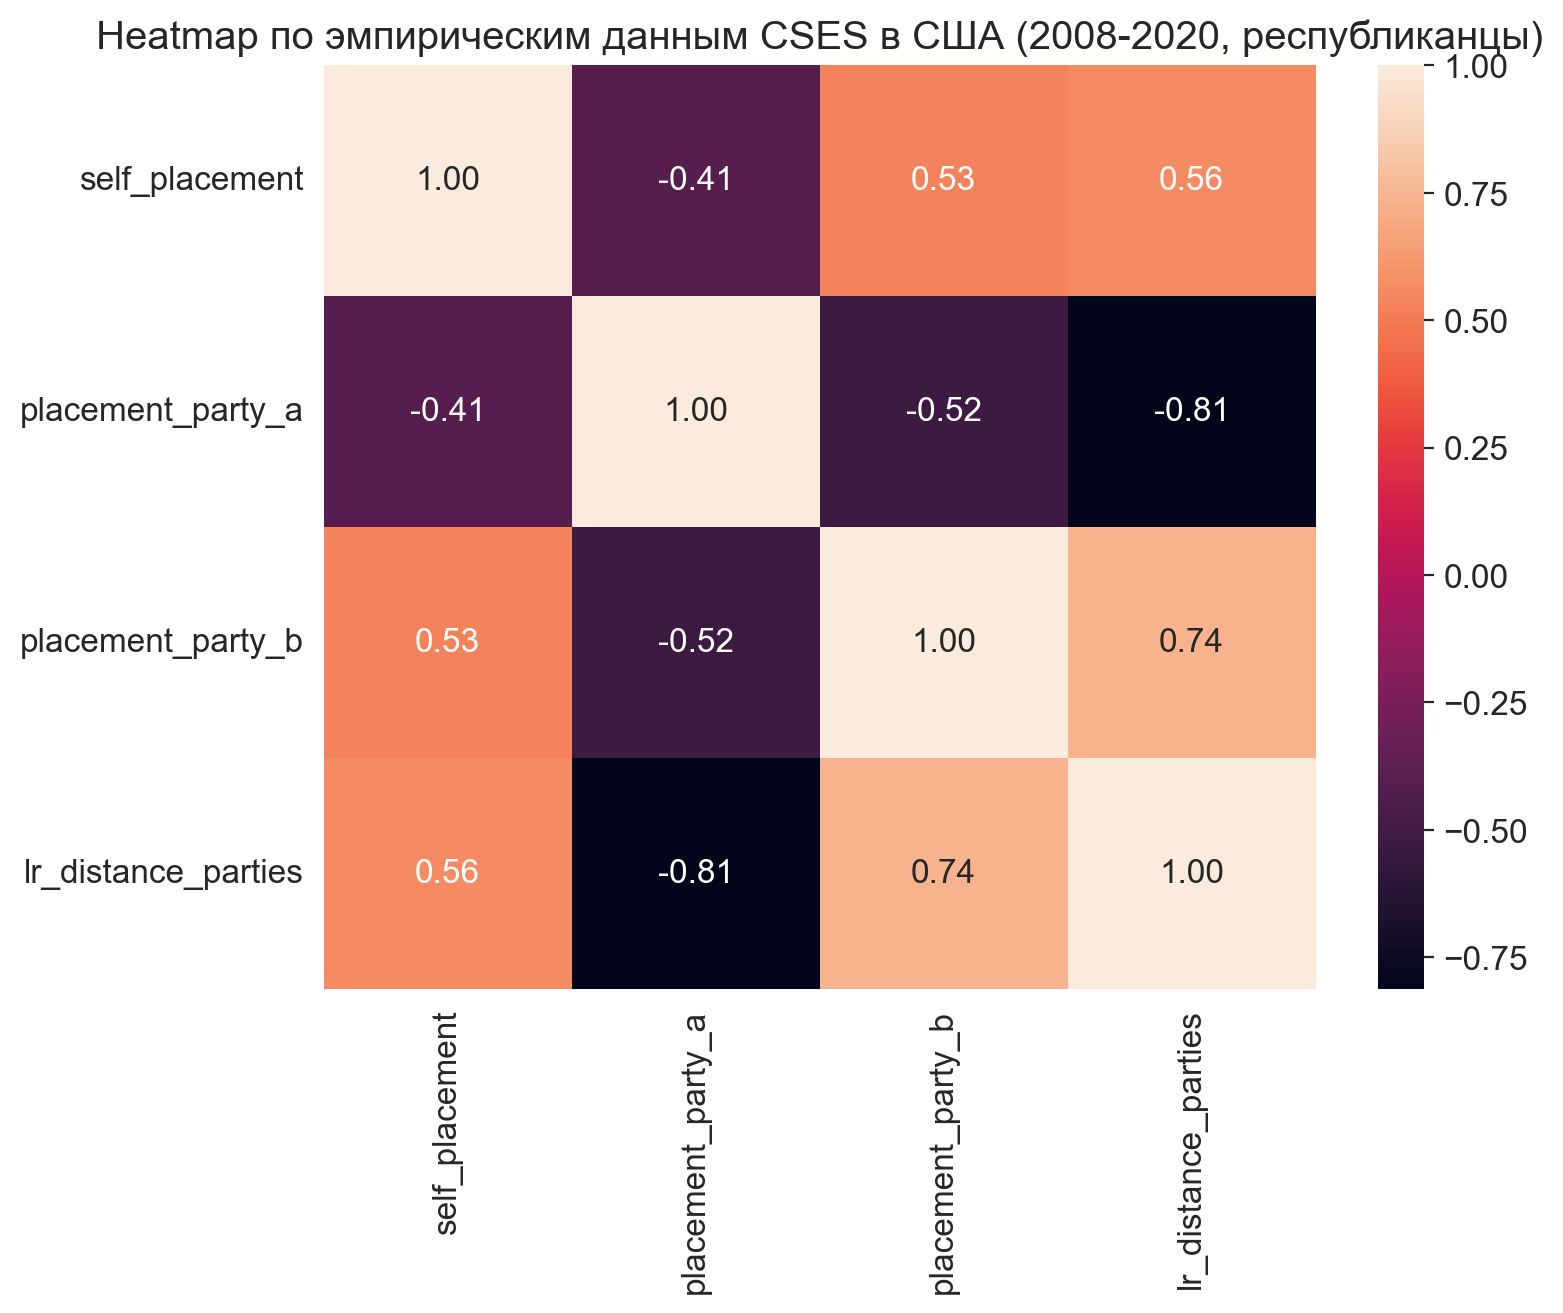

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_compare[df_compare['vote'] == 1][['self_placement', 'placement_party_a', 'placement_party_b', 'lr_distance_parties']].corr(), annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f"Heatmap по эмпирическим данным CSES в США (2008-2020, республиканцы)")
plt.show()